In [1]:
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/home/isaiah/scisim/_isaiah_stuff/research')
sys.path.insert(1, '/home/isaiah/scisim/_isaiah_stuff/research/solvers')

import data_import
import pandas as pd
import numpy as np
from solvers.policy_iter_v4 import PolicyIterationV4
from solvers.policy_iter_v2 import PolicyIterationV2
from solvers.policy_iter import PolicyIteration
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
pd_data_5: pd.DataFrame = data_import.read_files_to_pd_dataframe(
    [f"../outs/5_by_5_grid/itr_{i}.xml.out" for i in range(50)]
)
# pd_data_6: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/6_by_6_grid/itr_{i}.xml.out" for i in range(50)]
# )
# pd_data_7: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/7_by_7_grid/itr_{i}.xml.out" for i in range(50)]
# )
# pd_data_8: pd.DataFrame = data_import.read_files_to_pd_dataframe(
#     [f"../outs/8_by_8_grid/itr_{i}.xml.out" for i in range(50)]
# )

In [3]:
# main_df = pd.concat([pd_data_5, pd_data_6, pd_data_7, pd_data_8], ignore_index=True)
main_df = pd_data_5
main_df['pi_solver_v4'] = [
    PolicyIterationV4(main_df['Q'][i], main_df['b'][i], name=main_df['f_name'][i])
    for i in range(len(main_df))
]
main_df['pi_solver_v2'] = [
    PolicyIterationV2(main_df['Q'][i], main_df['b'][i], name=main_df['f_name'][i])
    for i in range(len(main_df))
]
main_df['pi_solver_v1'] = [
    PolicyIteration(main_df['Q'][i], main_df['b'][i], name=main_df['f_name'][i])
    for i in range(len(main_df))
]

In [4]:
for pi_solver in main_df['pi_solver_v1']:
    pi_solver.solve()

../outs/5_by_5_grid/itr_0.xml.out: DIVERGED AT ITERATION 34
../outs/5_by_5_grid/itr_1.xml.out: CONVERGED IN 8 ITERATIONS
../outs/5_by_5_grid/itr_2.xml.out: CONVERGED IN 5 ITERATIONS
../outs/5_by_5_grid/itr_3.xml.out: CONVERGED IN 13 ITERATIONS
../outs/5_by_5_grid/itr_4.xml.out: CONVERGED IN 8 ITERATIONS
../outs/5_by_5_grid/itr_5.xml.out: CONVERGED IN 3 ITERATIONS
../outs/5_by_5_grid/itr_6.xml.out: CONVERGED IN 6 ITERATIONS
../outs/5_by_5_grid/itr_7.xml.out: CONVERGED IN 9 ITERATIONS
../outs/5_by_5_grid/itr_8.xml.out: CONVERGED IN 19 ITERATIONS
../outs/5_by_5_grid/itr_9.xml.out: CONVERGED IN 9 ITERATIONS
../outs/5_by_5_grid/itr_10.xml.out: DIVERGED AT ITERATION 13
../outs/5_by_5_grid/itr_11.xml.out: DIVERGED AT ITERATION 57
../outs/5_by_5_grid/itr_12.xml.out: DIVERGED AT ITERATION 8
../outs/5_by_5_grid/itr_13.xml.out: CONVERGED IN 14 ITERATIONS
../outs/5_by_5_grid/itr_14.xml.out: CONVERGED IN 23 ITERATIONS
../outs/5_by_5_grid/itr_15.xml.out: CONVERGED IN 26 ITERATIONS
../outs/5_by_5_gri

In [5]:

for pi_solver in main_df['pi_solver_v2']:
    pi_solver.solve()

../outs/5_by_5_grid/itr_0.xml.out: CONVERGED IN 41 ITERATIONS
../outs/5_by_5_grid/itr_1.xml.out: CONVERGED IN 9 ITERATIONS
../outs/5_by_5_grid/itr_2.xml.out: CONVERGED IN 6 ITERATIONS
../outs/5_by_5_grid/itr_3.xml.out: CONVERGED IN 14 ITERATIONS
../outs/5_by_5_grid/itr_4.xml.out: CONVERGED IN 9 ITERATIONS
../outs/5_by_5_grid/itr_5.xml.out: CONVERGED IN 4 ITERATIONS
../outs/5_by_5_grid/itr_6.xml.out: CONVERGED IN 7 ITERATIONS
../outs/5_by_5_grid/itr_7.xml.out: CONVERGED IN 10 ITERATIONS
../outs/5_by_5_grid/itr_8.xml.out: CONVERGED IN 20 ITERATIONS
../outs/5_by_5_grid/itr_9.xml.out: CONVERGED IN 10 ITERATIONS
../outs/5_by_5_grid/itr_10.xml.out: CONVERGED IN 41 ITERATIONS
../outs/5_by_5_grid/itr_11.xml.out: CONVERGED IN 73 ITERATIONS
../outs/5_by_5_grid/itr_12.xml.out: reached max iterations
../outs/5_by_5_grid/itr_13.xml.out: CONVERGED IN 15 ITERATIONS
../outs/5_by_5_grid/itr_14.xml.out: CONVERGED IN 24 ITERATIONS
../outs/5_by_5_grid/itr_15.xml.out: CONVERGED IN 27 ITERATIONS
../outs/5_b

In [6]:

for pi_solver in main_df['pi_solver_v4']:
    try:
        pi_solver.solve()
    except Exception as e:
        print("exception...:", str(e))
        if str(e) != "Couldn't simplify Q :(":
            raise e

[1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
[1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
[1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
[1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0.]
[1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0.]
[1. 1. 1. 0. 

In [7]:
def get_policy_from_ipopt(ipopt_sol: np.ndarray, tol = 1e-6):
    p = np.zeros(len(ipopt_sol))
    for i in range(len(ipopt_sol)):
        if abs(ipopt_sol[i]) > tol:
            p[i] = 1.0
    return p

def get_policy_diff(a: np.ndarray, b: np.ndarray):
    # return np.linalg.norm(a - b, 1) / len(a)
    return np.linalg.norm(a - b, 1)

def plot_convergence(type: str, trial_num: int) -> None:
    ipopt_policy = get_policy_from_ipopt(main_df['ipopt_sol'][trial_num])
    intermediate_policies = main_df[type][trial_num].intermediate_policies
    intermediate_objective = main_df[type][trial_num].intermediate_objective
    intermediate_policy_diffs = [ get_policy_diff(ip, ipopt_policy) for ip in intermediate_policies ]
    pois = main_df[type][trial_num].pois

    fig, ax1 = plt.subplots()
    ax1.set_title(type)
    color = 'tab:red'
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('policy divergence from IPOPT (abs diff)', color=color)
    ax1.plot(intermediate_policy_diffs, color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    color = 'tab:blue'
    ax2.set_ylabel('objective', color=color)  # we already handled the x-label with ax1
    ax2.plot(intermediate_objective, color=color)
    ax2.set_yscale('log')
    ax2.tick_params(axis='y', labelcolor=color)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    for x in pois:
        plt.axvline(x=x, color='orange')
    plt.show()


# Convergence plots of PI V1, V2, & V4

## takeaways:

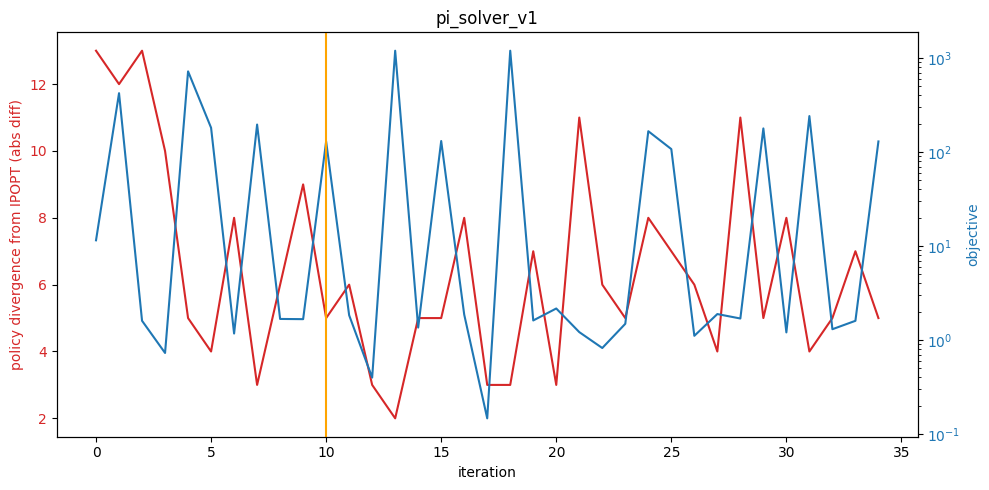

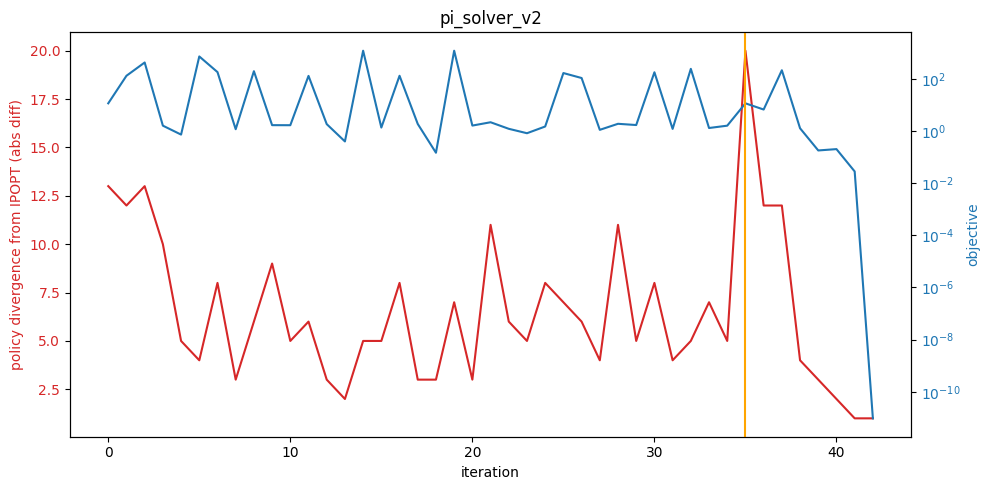

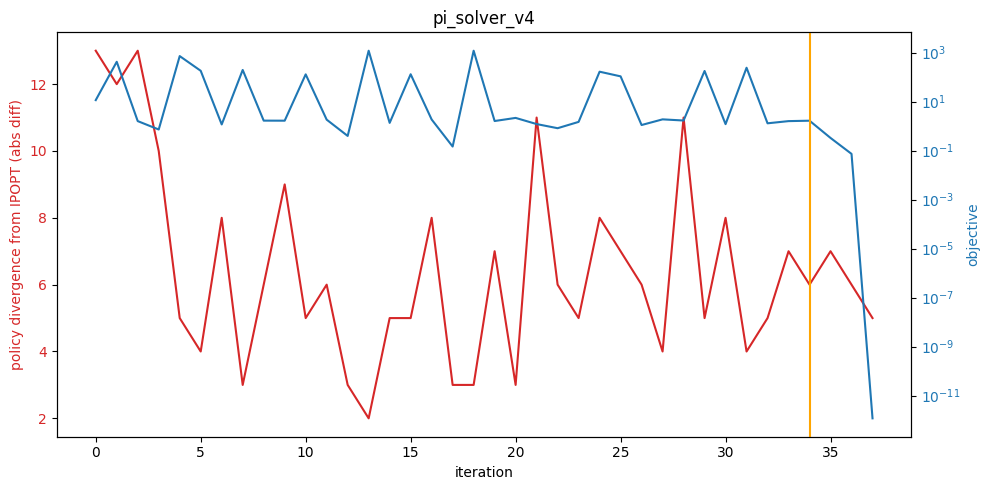

In [8]:
plot_convergence('pi_solver_v1', 0)
plot_convergence('pi_solver_v2', 0)
plot_convergence('pi_solver_v4', 0)

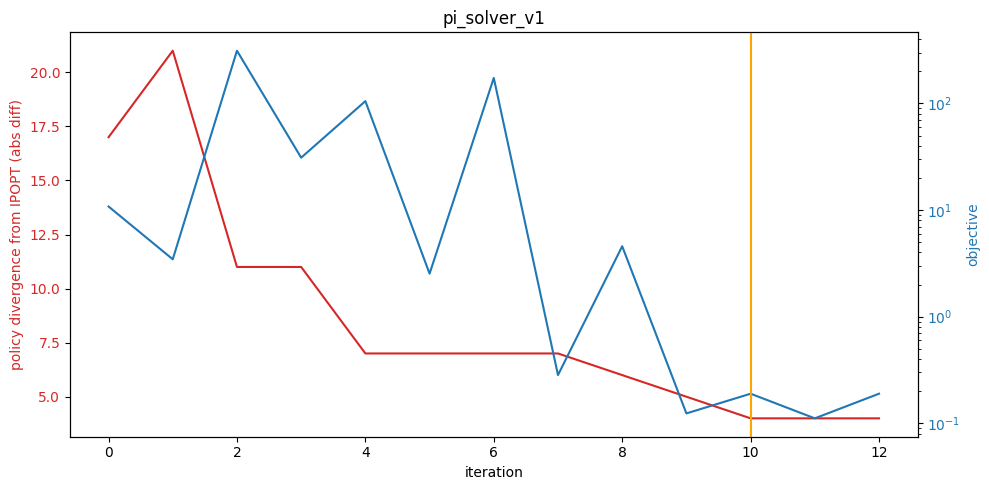

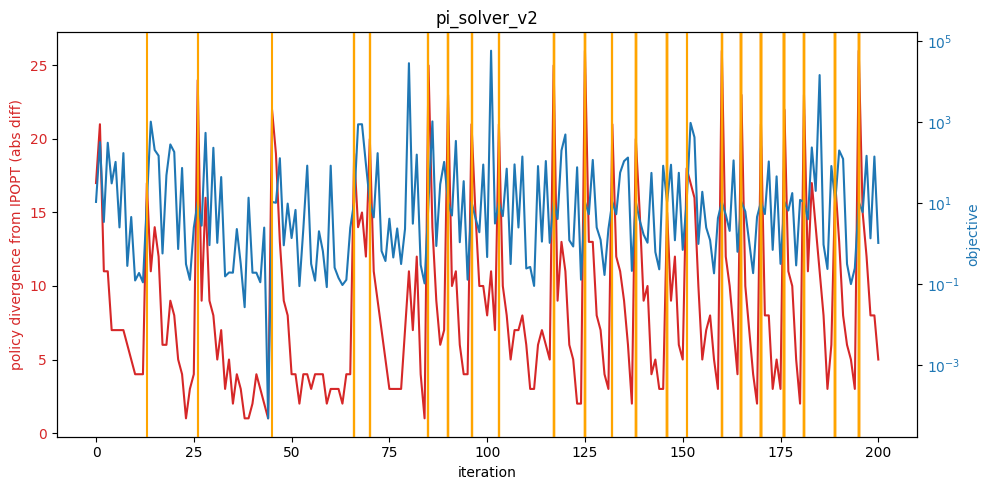

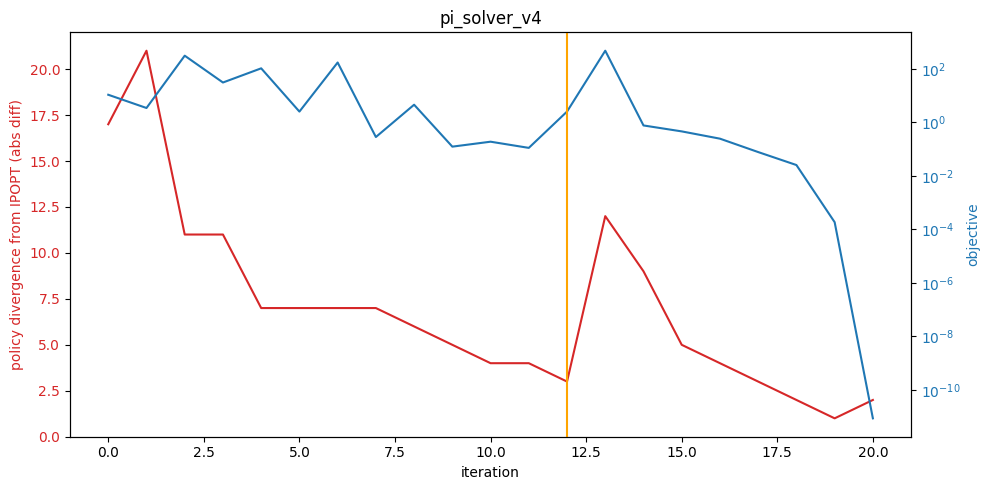

In [9]:
trial = 32
plot_convergence('pi_solver_v1', trial)
plot_convergence('pi_solver_v2', trial)
plot_convergence('pi_solver_v4', trial)

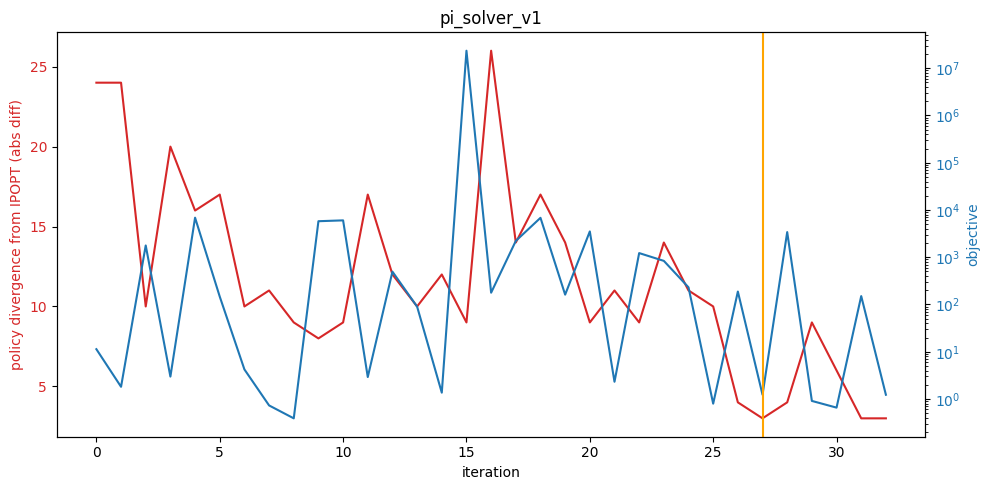

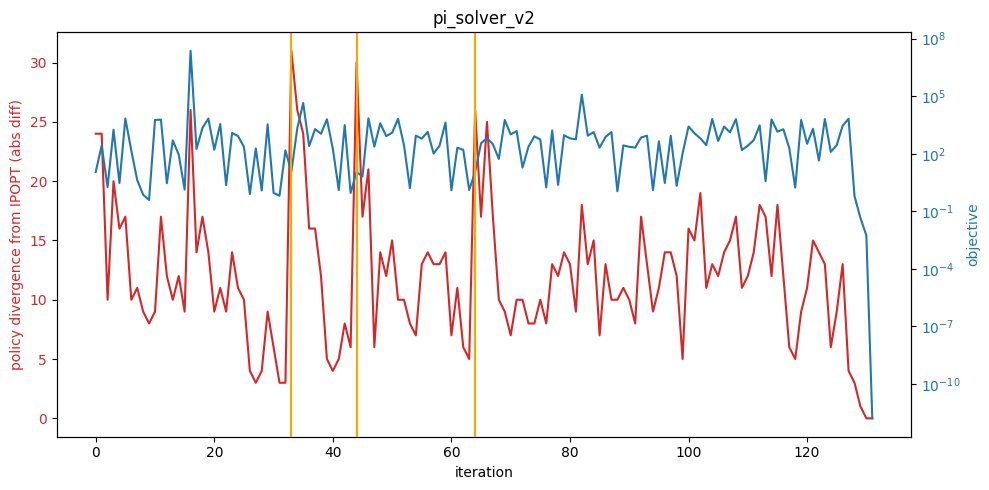

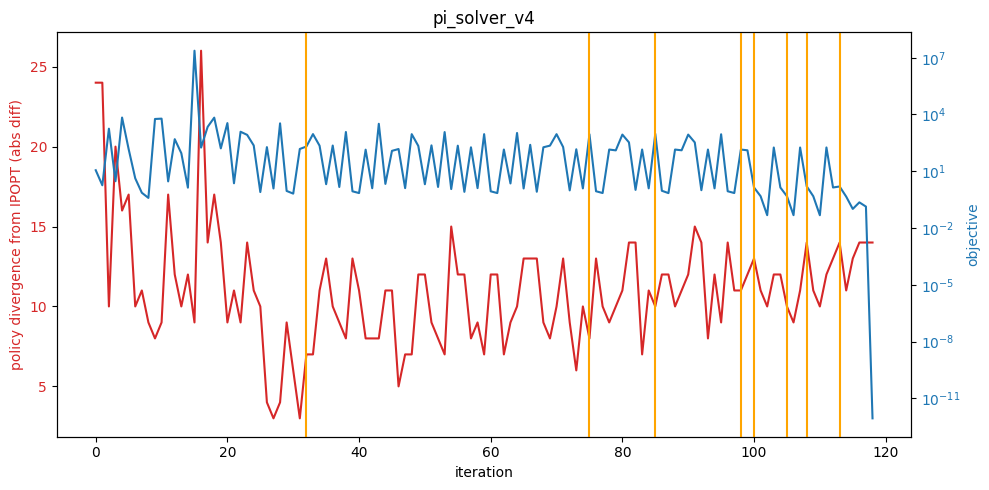

In [10]:
trial = 49
plot_convergence('pi_solver_v1', trial)
plot_convergence('pi_solver_v2', trial)
plot_convergence('pi_solver_v4', trial)

In [23]:
actual_Q = pd_data_5['pi_solver_v1'][49].Q
our_Q = pd_data_5['pi_solver_v4'][49].Q
our_value = pd_data_5['pi_solver_v4'][49].value
b = pd_data_5['pi_solver_v4'][49].b

our_policy = pd_data_5['pi_solver_v4'][49].policy

effective_policy = our_policy.copy()
for i in range(len(effective_policy)):
    if our_Q[i,i] == 1:
        effective_policy[i] = 0

correct_policy = pd_data_5['pi_solver_v2'][49].policy
correct_value = pd_data_5['pi_solver_v2'][49].value
np.set_printoptions(linewidth=1000)
print(our_policy)
print(effective_policy)
print(correct_policy)

print(np.linalg.norm(np.minimum(our_Q @ our_value - b, our_value)))
print(np.linalg.norm(np.minimum(actual_Q @ our_value - b, our_value)))
print(np.linalg.norm(np.minimum(actual_Q @ correct_value - b, correct_value)))

print(b)
print(correct_value)
print(actual_Q @ correct_value)
print(our_value)

[0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.]
[0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0.]
[1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.]
8.709381543302547e-13
6.596314781560761
1.6325392732388705e-12
[0.37606542 0.59557548 0.27041648 2.54505936 0.19571703 1.12981133 1.60420149 0.36927636 2.09849314 3.21313484 0.7715002  0.16722147 1.47878412 1.96987107 0.47695659 1.9554429  0.07552824 0.5779235  1.22854435 1.91587491 2.75117158 1.32401906 2.1503886  2.18706275 0.32614939 1.06685863 0.83898787 0.29351645 0.98020357 0.48760891 0.25629998 1.35238502 0.82677554 1.58543698 2.29613006 0.70431548 2.9